In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [4]:
강서_데이터 = pd.read_csv('../../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  요일  \
0        2023-05-08     200   ST-2037   ST-2037      1        1        30   0   
1        2023-05-08    1155    ST-824    ST-824      1        1        80   0   
2        2023-05-08    1230    ST-829    ST-829      1        1       111   0   
3        2023-05-08    1340   ST-2611   ST-2611      1        1        10   0   
4        2023-05-08    1635   ST-2031   ST-2031      1        1       170   0   
...             ...     ...       ...       ...    ...      ...       ...  ..   
1739278  2023-12-06    2350   ST-2036   ST-1718      1        3       523   2   
1739279  2023-12-06    2350   ST-2831   ST-1645      1        5       639   2   
1739280  2023-12-06    2350   ST-1715   ST-2045      1        2       400   2   
1739281  2023-12-06    2355   ST-1062   ST-2789      1        3       540   2   
1739282  2023-12-06    2355   ST-1402   ST-2965      1        3       423   2   

         주말  휴일  
0        

In [5]:
강서_데이터_출근 = 강서_데이터[(강서_데이터['기준_시간대'] >= 600) & (강서_데이터['기준_시간대'] <= 1000)]
강서_데이터_퇴근 = 강서_데이터[(강서_데이터['기준_시간대'] >= 1700) & (강서_데이터['기준_시간대'] <= 2100)]

In [6]:
print(강서_데이터_출근)
print('-' * 100)
print(강서_데이터_퇴근)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  요일  \
609      2023-05-08     600   ST-1253   ST-1676      1       10      1248   0   
610      2023-05-08     600   ST-1253   ST-1718      1        3       762   0   
611      2023-05-08     600   ST-1253   ST-2031      1        3       830   0   
612      2023-05-08     600   ST-1254   ST-2858      1        4      1104   0   
613      2023-05-08     600   ST-1351   ST-2550      1        8      2010   0   
...             ...     ...       ...       ...    ...      ...       ...  ..   
1733236  2023-12-06    1000   ST-2557   ST-1249      1        5       870   2   
1733237  2023-12-06    1000   ST-2056   ST-2049      1        1       270   2   
1733238  2023-12-06    1000   ST-2045   ST-2042      1        4       746   2   
1733239  2023-12-06    1000   ST-1251   ST-2044      1        8      1118   2   
1733240  2023-12-06    1000   ST-2027   ST-2993      1       17      2814   2   

         주말  휴일  
609      

In [7]:
# condition = 강서_데이터_출근['시작_대여소_ID'] == 'ST-2033'

a = 강서_데이터_퇴근.groupby('시작_대여소_ID')['전체_건수'].sum()

print(a)


시작_대여소_ID
ST-1062     3947
ST-1063     5795
ST-1064     9005
ST-1065    14431
ST-1067     2666
           ...  
ST-829      1792
ST-831      3970
ST-834      6179
ST-835      5461
ST-975      7355
Name: 전체_건수, Length: 195, dtype: int64


In [8]:
# condition2 = 강서_데이터_출근['종료_대여소_ID'] == 'ST-2033'

b = 강서_데이터_퇴근.groupby('종료_대여소_ID')['전체_건수'].sum()

print(b)

종료_대여소_ID
ST-1062     5456
ST-1063     3170
ST-1064     5562
ST-1065    16569
ST-1067     3654
           ...  
ST-829      1846
ST-831      4425
ST-834      6293
ST-835      7917
ST-975      8050
Name: 전체_건수, Length: 195, dtype: int64


In [9]:
a.index

Index(['ST-1062', 'ST-1063', 'ST-1064', 'ST-1065', 'ST-1067', 'ST-1069',
       'ST-1249', 'ST-1250', 'ST-1251', 'ST-1252',
       ...
       'ST-535', 'ST-536', 'ST-538', 'ST-824', 'ST-828', 'ST-829', 'ST-831',
       'ST-834', 'ST-835', 'ST-975'],
      dtype='object', name='시작_대여소_ID', length=195)

In [10]:
b.index

Index(['ST-1062', 'ST-1063', 'ST-1064', 'ST-1065', 'ST-1067', 'ST-1069',
       'ST-1249', 'ST-1250', 'ST-1251', 'ST-1252',
       ...
       'ST-535', 'ST-536', 'ST-538', 'ST-824', 'ST-828', 'ST-829', 'ST-831',
       'ST-834', 'ST-835', 'ST-975'],
      dtype='object', name='종료_대여소_ID', length=195)

In [11]:
condition = b.index.isin(a.index)
print(condition)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [12]:
a.index[-35]

'ST-3284'

In [13]:
b.index[-35]

'ST-3284'

In [55]:
b = b.drop('ST-3284')

In [56]:
b

종료_대여소_ID
ST-1062    2303
ST-1063    8806
ST-1064    8571
ST-1065    5590
ST-1067    2990
           ... 
ST-829     1005
ST-831     1538
ST-834     4368
ST-835     2164
ST-975     2504
Name: 전체_건수, Length: 194, dtype: int64

In [14]:
퇴근시간_대여소_이용량 = {'대여소_ID': b.index, '강서_데이터_시작' : a.values, '강서_데이터_종료' : b.values}

퇴근시간_대여소_이용량 = pd.DataFrame(퇴근시간_대여소_이용량)
퇴근시간_대여소_이용량

,대여소_ID,강서_데이터_시작,강서_데이터_종료
0,ST-1062,3947,5456
1,ST-1063,5795,3170
2,ST-1064,9005,5562
3,ST-1065,14431,16569
4,ST-1067,2666,3654
...,...,...,...
190,ST-829,1792,1846
191,ST-831,3970,4425
192,ST-834,6179,6293
193,ST-835,5461,7917


In [15]:
퇴근시간_대여소_이용량.to_csv('퇴근시간_대여소_이용량2.csv')

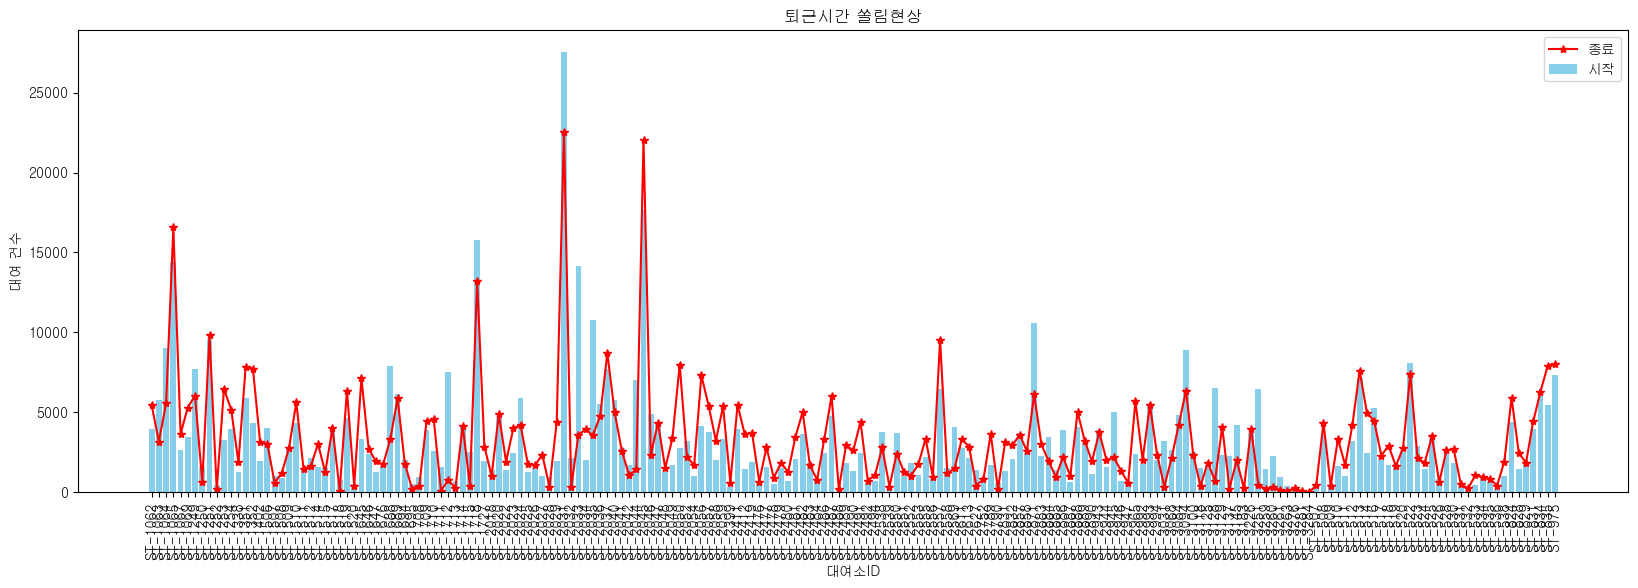

In [16]:
# 겹쳐그리기
fig, ax = plt.subplots(figsize = (20,6))

ax.bar(a.index, a.values, label = '시작', color = 'skyblue')
ax.plot(b.index, b.values, marker='*', label = '종료', color = 'red')
plt.title('퇴근시간 쏠림현상')
plt.xlabel('대여소ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.legend(loc='best')

# plt.xlim(0, len(a))

plt.show()